In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
import tensorflow                           #To understand the code from reference and reduce complexity , tensorflow version is altered.
print(tensorflow.__version__)

1.15.2


In [3]:
#Import dependencies:
import warnings  
with warnings.catch_warnings():  
    warnings.filterwarnings("ignore",category=FutureWarning)

In [4]:
import tensorflow as tf
import numpy as np
import re
import math
from tqdm import tqdm                      #Progress bar
import matplotlib.pyplot as plt

In [5]:
#Importing the data:'
m_lines = open("/content/drive/MyDrive/Cornell-Dataset/movie_lines.txt" , encoding='utf-8',errors='ignore').read().split('\n')
c_lines = open("/content/drive/MyDrive/Cornell-Dataset/movie_conversations.txt", encoding='utf-8',errors='ignore').read().split('\n')

In [6]:
len(m_lines),len(c_lines)

(304714, 83098)

In [7]:
                                                                              #To have exact conversational and movie lines
#Sample form of lines in c_lines : u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L194', 'L195', 'L196', 'L197'] 
convo_line = []
for lines in c_lines:
    _lines = lines.split(" +++$+++ ")[-1][1:-1].replace("'","").replace(" ","")
    convo_line.append(_lines.split(","))

In [8]:
len(convo_line)

83098

In [9]:
convo_line 

[['L194', 'L195', 'L196', 'L197'],
 ['L198', 'L199'],
 ['L200', 'L201', 'L202', 'L203'],
 ['L204', 'L205', 'L206'],
 ['L207', 'L208'],
 ['L271', 'L272', 'L273', 'L274', 'L275'],
 ['L276', 'L277'],
 ['L280', 'L281'],
 ['L363', 'L364'],
 ['L365', 'L366'],
 ['L367', 'L368'],
 ['L401', 'L402', 'L403'],
 ['L404', 'L405', 'L406', 'L407'],
 ['L575', 'L576'],
 ['L577', 'L578'],
 ['L662', 'L663'],
 ['L693', 'L694', 'L695'],
 ['L696', 'L697', 'L698', 'L699'],
 ['L860', 'L861'],
 ['L862', 'L863', 'L864', 'L865'],
 ['L866', 'L867', 'L868', 'L869'],
 ['L870', 'L871', 'L872'],
 ['L924', 'L925'],
 ['L984', 'L985'],
 ['L1044', 'L1045'],
 ['L49', 'L50', 'L51'],
 ['L571', 'L572', 'L573'],
 ['L579', 'L580'],
 ['L595', 'L596', 'L597'],
 ['L598', 'L599', 'L600'],
 ['L659', 'L660'],
 ['L952', 'L953'],
 ['L394', 'L395'],
 ['L396', 'L397'],
 ['L589', 'L590', 'L591'],
 ['L592', 'L593'],
 ['L756', 'L757', 'L758'],
 ['L759', 'L760'],
 ['L164', 'L165'],
 ['L319', 'L320'],
 ['L441', 'L442', 'L443', 'L444', 'L445']

In [10]:
#Sample form of lines in m_lines:L1045 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ They do not!
id_line = {}
for lines in m_lines:
    _lines = lines.split(" +++$+++ ")
    if len(_lines) == 5:
        id_line[_lines[0]] = _lines[4]

In [11]:
len(id_line)

304713

In [12]:
id_line

{'L1045': 'They do not!',
 'L1044': 'They do to!',
 'L985': 'I hope so.',
 'L984': 'She okay?',
 'L925': "Let's go.",
 'L924': 'Wow',
 'L872': "Okay -- you're gonna need to learn how to lie.",
 'L871': 'No',
 'L870': 'I\'m kidding.  You know how sometimes you just become this "persona"?  And you don\'t know how to quit?',
 'L869': 'Like my fear of wearing pastels?',
 'L868': 'The "real you".',
 'L867': 'What good stuff?',
 'L866': "I figured you'd get to the good stuff eventually.",
 'L865': 'Thank God!  If I had to hear one more story about your coiffure...',
 'L864': "Me.  This endless ...blonde babble. I'm like, boring myself.",
 'L863': 'What crap?',
 'L862': 'do you listen to this crap?',
 'L861': 'No...',
 'L860': 'Then Guillermo says, "If you go any lighter, you\'re gonna look like an extra on 90210."',
 'L699': 'You always been this selfish?',
 'L698': 'But',
 'L697': "Then that's all you had to say.",
 'L696': 'Well, no...',
 'L695': "You never wanted to go out with 'me, did y

In [13]:
#Form questions and answers from convo_line
questions = []
answers = []

for line in convo_line:
    for i in range(len(line) -1):
        questions.append(id_line[line[i]])
        answers.append(id_line[line[i+1]])

In [14]:
len(questions)

221616

In [15]:
len(answers)

221616

In [16]:
#Clean and replace improper words using regular expression
def clean_text(text):
    text = text.lower()
    
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r"it's", "it is", text)
    text = re.sub(r"that's", "that is", text)
    text = re.sub(r"what's", "that is", text)
    text = re.sub(r"where's", "where is", text)
    text = re.sub(r"how's", "how is", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can't", "cannot", text)
    text = re.sub(r"n't", " not", text)
    text = re.sub(r"n'", "ng", text)
    text = re.sub(r"'bout", "about", text)
    text = re.sub(r"'til", "until", text)
    text = re.sub(r"  ","",text)
    text = re.sub(r"[-()\"#/@;:<>{}`+=~|.!?,]", "", text)
    
    return text

clean_questions = []
clean_answers = []

for q in questions:
    clean_questions.append(clean_text(q))
for a in answers:
    clean_answers.append(clean_text(a))

In [17]:
len(clean_questions),len(clean_answers)

(221616, 221616)

In [18]:
#get the min and max length of sentence need to be used
max_length = 5
min_length = 2

short_questions_temp = []
short_answers_temp = []

i = 0
for question in clean_questions:
    if len(question.split()) >= min_length and len(question.split()) <= max_length:
        short_questions_temp.append(question)
        short_answers_temp.append(clean_answers[i])
    i += 1

# Filter out the answers that are too short/long
shorted_q = []
shorted_a = []

i = 0
for answer in short_answers_temp:
    if len(answer.split()) >= min_length and len(answer.split()) <= max_length:
        shorted_a.append(answer)
        shorted_q.append(short_questions_temp[i])
    i += 1

In [19]:
len(shorted_q),len(shorted_a)

(23120, 23120)

In [20]:
shorted_q

['what good stuff',
 'she okay',
 'they do to',
 'hey sweet cheeks',
 'where have you been',
 'you are so completely unbalanced',
 'let go',
 'you set me up',
 'daddy i ',
 'daddy no',
 'the promkat has a date',
 'you the new guy',
 'so  which dakota you from',
 'get out',
 "that is herbianca's sister",
 'her favorite uncle',
 'he is pretty',
 'you making any headway',
 'that is the worst',
 'hey  do you mind',
 'a hundred bucks a date',
 'forget it',
 'it is about time',
 'how would you do it',
 'uhyeahwe are old friend*',
 "who's that",
 'he always look so',
 'that is this',
 'that is never been proven',
 'you think this will work',
 'what would he say',
 'pick you up friday then',
 'whyare you doing this',
 'no you were not',
 'then why would you ask',
 'i should do this',
 'put your right foot there ',
 'so that is your excuse',
 'something like that',
 'tell me something true',
 'parts of it',
 'cool picturesyou a fan',
 'you think',
 'you are completely demented',
 'in the microw

In [21]:
shorted_a

['the real you',
 'i hope so',
 'they do not',
 'hi joey',
 'nowhere hi daddy',
 'can we go now',
 'you set me up',
 'i just wanted ',
 'and where are you going',
 'just for a minute',
 'no but',
 'so they tell me',
 'north actuallyhow would you ',
 'how many people go here',
 'the mewling rampalian wretch herself',
 'dead at fortyone',
 'okayi was not sure',
 'she kissed me',
 'you get the girl',
 'not at all',
 'forget it',
 'forget her sister then',
 "a deal's a deal",
 'do what',
 'you and verona',
 'patrick verona random skid',
 'block e',
 'an attempted slit',
 'neither has his heterosexuality',
 'no fear',
 'who cares',
 'oh rightfriday',
 'i told you',
 'then why would you ask',
 'why would you lie',
 'do what',
 'forget iti am staying',
 'acting the way we do',
 'then you screwed up',
 'i hate peas',
 'which parts',
 'yeahi guess',
 'oh yeah',
 'see you next week',
 'make anyone cry today',
 'but  who  what ',
 'we will all go crazy',
 'thank god',
 'bartolome and giacomo colo

In [22]:
#Get the count of words from filtered questions and answers  
vocab = {}

for question in shorted_q:
    for words in question.split():
        if words not in vocab:
            vocab[words] = 1
        else:
            vocab[words] +=1
for answer in shorted_a:
    for words in answer.split():
        if words not in vocab:
            vocab[words] = 1
        else:
            vocab[words] +=1
            
questions_vocabs = {}
for answer in shorted_q:
    for words in answer.split():
        if words not in questions_vocabs:
            questions_vocabs[words] = 1
        else:
            questions_vocabs[words] +=1
            
answers_vocabs = {}
for answer in shorted_a:
    for words in answer.split():
        if words not in answers_vocabs:
            answers_vocabs[words] = 1
        else:
            answers_vocabs[words] +=1

In [23]:
len(vocab),len(questions_vocabs),len(answers_vocabs)

(13873, 9607, 9632)

In [24]:
vocab

{'what': 3470,
 'good': 657,
 'stuff': 42,
 'she': 735,
 'okay': 482,
 'they': 623,
 'do': 2846,
 'to': 1447,
 'hey': 231,
 'sweet': 33,
 'cheeks': 1,
 'where': 954,
 'have': 939,
 'you': 9038,
 'been': 155,
 'are': 2807,
 'so': 698,
 'completely': 13,
 'unbalanced': 1,
 'let': 145,
 'go': 689,
 'set': 19,
 'me': 1707,
 'up': 482,
 'daddy': 49,
 'i': 6901,
 'no': 1568,
 'the': 3217,
 'promkat': 1,
 'has': 104,
 'a': 2399,
 'date': 16,
 'new': 102,
 'guy': 80,
 'which': 109,
 'dakota': 5,
 'from': 206,
 'get': 546,
 'out': 435,
 'that': 3210,
 'is': 5806,
 "herbianca's": 1,
 'sister': 37,
 'her': 402,
 'favorite': 11,
 'uncle': 20,
 'he': 1292,
 'pretty': 78,
 'making': 19,
 'any': 173,
 'headway': 1,
 'worst': 4,
 'mind': 68,
 'hundred': 48,
 'bucks': 23,
 'forget': 79,
 'it': 4005,
 'about': 810,
 'time': 225,
 'how': 1030,
 'would': 509,
 'uhyeahwe': 1,
 'old': 106,
 'friend*': 1,
 "who's": 186,
 'always': 70,
 'look': 316,
 'this': 1018,
 'never': 201,
 'proven': 2,
 'think': 421,
 

In [25]:
#total number of words appear more than 2 times
vocabs_to_index = {}
threshold = 2
i = 0
for word, count in vocab.items():
    if count >= threshold:
        vocabs_to_index[word] = i
        i += 1

In [26]:
len(vocabs_to_index)                 # Each token is assigned with index starts at 0

6282

In [27]:
codes = ['<PAD>','<EOS>','<UNK>','<GO>']   #Add these codes to the following repositories
for code in codes:
    vocabs_to_index[code] = len(vocabs_to_index)+1
    
for code in codes:
    questions_vocabs[code] = len(questions_vocabs)+1

for code in codes:
    answers_vocabs[code] = len(answers_vocabs)+1

#Convert index vocab to vocab index   
index_to_vocabs = {v_i: v for v, v_i in vocabs_to_index.items()}                               #previously the format is vocab:index and due to this it is now in the format of index:vocab

#Add <EOS> to the end of all the answer in such a way model can learn the the sentence comes to the end 
for i in range(len(shorted_a)):
  shorted_a[i] += ' <EOS>'

In [28]:
len(vocabs_to_index),len(questions_vocabs),len(answers_vocabs)

(6286, 9611, 9636)

In [29]:
#Convert all tokens with index at shorted_a and shorted_b with putting index of <UNK> for tokens which is not matching vocabs_to_index repository.

questions_int = []
for question in shorted_q:
    ints = []
    for word in question.split():
        if word not in vocabs_to_index:
            ints.append(vocabs_to_index['<UNK>'])
        else:
            ints.append(vocabs_to_index[word])
    questions_int.append(ints)
    
answers_int = []
for answer in shorted_a:
    ints = []
    for word in answer.split():
        if word not in vocabs_to_index:
            ints.append(vocabs_to_index['<UNK>'])
        else:
            ints.append(vocabs_to_index[word])
    answers_int.append(ints)

In [30]:
questions_int

[[0, 1, 2],
 [3, 4],
 [5, 6, 7],
 [8, 9, 6285],
 [10, 11, 12, 13],
 [12, 14, 15, 16, 6285],
 [17, 18],
 [12, 19, 20, 21],
 [22, 23],
 [22, 24],
 [25, 6285, 26, 27, 28],
 [12, 25, 29, 30],
 [15, 31, 32, 12, 33],
 [34, 35],
 [36, 37, 6285, 38],
 [39, 40, 41],
 [42, 37, 43],
 [12, 44, 45, 6285],
 [36, 37, 25, 46],
 [8, 6, 12, 47],
 [27, 48, 49, 27, 28],
 [50, 51],
 [51, 37, 52, 53],
 [54, 55, 12, 6, 51],
 [6285, 14, 56, 6285],
 [57, 36],
 [42, 58, 59, 15],
 [36, 37, 60],
 [36, 37, 61, 13, 62],
 [12, 63, 60, 64, 65],
 [0, 55, 42, 66],
 [67, 12, 21, 68, 69],
 [70, 12, 71, 60],
 [24, 12, 72, 73],
 [69, 74, 55, 12, 75],
 [23, 76, 6, 60],
 [77, 78, 79, 80, 81],
 [15, 36, 37, 78, 82],
 [83, 84, 36],
 [85, 20, 83, 86],
 [87, 88, 51],
 [89, 6285, 27, 90],
 [12, 63],
 [12, 14, 16, 6285],
 [91, 25, 92],
 [11, 27, 93, 53, 94],
 [42, 37, 25, 6285, 95],
 [3, 96, 97],
 [98, 23, 75, 99, 100],
 [101, 6285, 102, 6285],
 [103, 104, 88, 105],
 [105, 7, 0],
 [54, 14, 12, 106, 107],
 [23, 108, 73, 6285],
 [12

In [31]:
#Assigning configuration parameters
target_vocab_size = len(answers_vocabs)
source_vocab_size = len(questions_vocabs)
vocab_size = len(index_to_vocabs)+1  #??????????
embed_size = 1024
rnn_size = 1024          #is the number of hidden units whose activations get sent forward to the next time step.  
batch_size = 32
num_layers =  3
learning_rate = 0.001
learning_rate_decay = 0.99   #The way in which the learning rate changes over time (training epochs) is referred to as the learning rate schedule or learning rate decay.
min_lr = 0.0001
keep_prob = 0.5              # control the dropout rate used when training the network
epochs=50
DISPLAY_STEP=30   #???????????

In [32]:
#Define LSTM with dropout wrapper:
def lstm(rnn_size, keep_prob,reuse=False):
    lstm =tf.nn.rnn_cell.LSTMCell(rnn_size,reuse=reuse)
    drop =tf.nn.rnn_cell.DropoutWrapper(lstm, output_keep_prob=keep_prob)
    return drop

Bahdanau Attention Mechanism

In [33]:
def attention(rnn_size,encoder_outputs,target_sequence_length,dec_cell):
    attention_mechanism = tf.contrib.seq2seq.BahdanauAttention(rnn_size*2,encoder_outputs,
                                                                   memory_sequence_length=target_sequence_length)
    attention_cell = tf.contrib.seq2seq.AttentionWrapper(dec_cell, attention_mechanism,
                                                             attention_layer_size=rnn_size/2)
    return attention_cell
#rnn_size is nothing but a hidden state dimension(d) and target_sequence_length implies sequential length of target input , dec_cell implies rnn_cell at decoder 
#In BahdanauAttention hidden state of encoder is to be cocatenated with previous cell decoder hidden state and this is mentioned here as rnn_size*2 and the size is 2d
#encoder_outputs refer here context vector.
#memory sequence length imples here target sentence sequence length
#Attention cell is what considered to be concatenate with decoder previous cell hidden state.
#both concatenated product, once again decoder cell previous hidden state and target input is getting in decoder rnn for output.
#So attention_layer_size here denotes the context vector hidden state ..so it has to devided once again as rnn_size/2.Now rnn_size is d 
#Attention cell includes all operations regarding Bahdanau Attention Mechanism.

In [34]:

#Introduce Placeholder                                      ??????????????????????????????????
input_data = tf.placeholder(tf.int32, [None, None],name='input')
target_data = tf.placeholder(tf.int32, [None, None],name='target')
input_data_len = tf.placeholder(tf.int32,[None],name='input_len')
target_data_len = tf.placeholder(tf.int32,[None],name='target_len')
lr_rate = tf.placeholder(tf.float32,name='lr')
keep_prob = tf.placeholder(tf.float32,name='keep_prob')
#A placeholder is simply a variable that we will assign data for future use. 
#It allows us to create our operations and build our computation graph, without needing the data. In TensorFlowterminology, we then feed data into the graph through these placeholders.

In [35]:
#Word Embedding
encoder_embeddings = tf.Variable(tf.random_uniform([source_vocab_size, embed_size], -1, 1))             # min value = -1 , max_value=1 
#tf.Variable is used here to have embedding matrix same everytime we run the session 
# random_uniform is here used initialize the tensor with min value and max_value

In [36]:
encoder_embedded = tf.nn.embedding_lookup(encoder_embeddings, input_data)           
#Embedding_lookup let the data in a sequential ie token by token as each token is featured with embedding dimension 1024

In [37]:
#Configure Bidirectional LSTM for encoder:
stacked_cells = lstm(rnn_size, keep_prob)                        #Our case of LSTM is '2 layer bidirectional LSTM' ie 2-fowards and 2 backwards 

((encoder_fw_outputs,encoder_bw_outputs),
 (encoder_fw_final_state,encoder_bw_final_state)) = tf.nn.bidirectional_dynamic_rnn(cell_fw=stacked_cells, 
                                                                 cell_bw=stacked_cells, 
                                                                 inputs=encoder_embedded, 
                                                                 sequence_length=input_data_len, 
                                                                 dtype=tf.float32)
#Concatenate fw hidden state and bw hidden state 
encoder_outputs = tf.concat((encoder_fw_outputs,encoder_bw_outputs),2)                             #Concatenate the hidden states of both forward and backward
#encoder_outputs(<tf.Tensor 'concat:0' shape=(?, ?, 2048) dtype=float32>)


Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.Bidirectional(keras.layers.RNN(cell))`, which is equivalent to this API
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [38]:
#LSTM state tuple 
encoder_state_c = tf.concat((encoder_fw_final_state.c,encoder_bw_final_state.c),1)                 #Long term memory
encoder_state_h = tf.concat((encoder_fw_final_state.h,encoder_bw_final_state.h),1)                 #Short term memory
encoder_states = tf.nn.rnn_cell.LSTMStateTuple(c=encoder_state_c,h=encoder_state_h)
#LSTMStateTuple(c=<tf.Tensor 'concat_1:0' shape=(?, 2048) dtype=float32>, h=<tf.Tensor 'concat_2:0' shape=(?, 2048) dtype=float32>)

In [39]:
main = tf.strided_slice(target_data, [0, 0], [batch_size, -1], [1, 1])                             #Pluck out batch wise sequences to decoder input
decoder_input = tf.concat([tf.fill([batch_size, 1],vocabs_to_index['<GO>']), main], 1)             #used to add <GO>  as start sequence

In [40]:
decoder_embeddings = tf.Variable(tf.random_uniform([target_vocab_size, embed_size], -1, 1))
dec_cell_inputs = tf.nn.embedding_lookup(decoder_embeddings, decoder_input)
#Variable and embedding_lookup make sure sequential input of target sentences to decoder as how it was with encoder.

In [41]:
dec_cell_inputs

<tf.Tensor 'embedding_lookup_1/Identity:0' shape=(32, ?, 1024) dtype=float32>

In [42]:
dec_cell = lstm(rnn_size*2,keep_prob)
#Decoder cell hidden state is once again 2d 

In [43]:
#output layer for decoder
dense_layer = tf.layers.Dense(target_vocab_size)

In [44]:
#To read decoder cell inputs, introduce Training Helper
train_helper = tf.contrib.seq2seq.TrainingHelper(dec_cell_inputs, target_data_len)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [45]:
#Initiate cell_state of LSTM:
attention_cell = attention(rnn_size,encoder_outputs,target_data_len,dec_cell)
state = attention_cell.zero_state(dtype=tf.float32, batch_size=batch_size)
state = state.clone(cell_state=encoder_states)               #cell_state

In [46]:
#Basic sampling decoder  
decoder_train = tf.contrib.seq2seq.BasicDecoder(cell=attention_cell, helper=train_helper, 
                                                  initial_state=state,
                                                  output_layer=dense_layer)
decoder_train

In [47]:
#Dynamic decoding: (Integrate sampling decoder)
outputs_train, _, _ = tf.contrib.seq2seq.dynamic_decode(decoder_train, 
                                                  impute_finished=True, 
                                                  maximum_iterations=tf.reduce_max(target_data_len))
outputs_train

BasicDecoderOutput(rnn_output=<tf.Tensor 'decoder/transpose:0' shape=(32, ?, 9636) dtype=float32>, sample_id=<tf.Tensor 'decoder/transpose_1:0' shape=(32, ?) dtype=int32>)

Inference 

In [48]:
infer_helper = tf.contrib.seq2seq.GreedyEmbeddingHelper(decoder_embeddings, 
                                                          tf.fill([batch_size], vocabs_to_index['<GO>']), 
                                                          vocabs_to_index['<EOS>'])                              
# using Greedy search embedding layer to assign start token <Go> and end token 
#And Uses the argmax of the output (treated as logits) and passes the result through an embedding layer to get the next input.

decoder_infer = tf.contrib.seq2seq.BasicDecoder(cell=attention_cell, helper=infer_helper, 
                                                  initial_state=state,
                                                  output_layer=dense_layer)

outputs_infer, _, _ = tf.contrib.seq2seq.dynamic_decode(decoder_infer, impute_finished=True,
                                                          maximum_iterations=tf.reduce_max(target_data_len))
#Integrate decoder_infer for entire decode input data


In [49]:
# Identify training and inference output by names:
training_logits = tf.identity(outputs_train.rnn_output, name='logits')                             #Training output 
inference_logits = tf.identity(outputs_infer.sample_id, name='predictions')                        #Inference output

In [50]:
# padding and masking of target data
masks = tf.sequence_mask(target_data_len, tf.reduce_max(target_data_len), dtype=tf.float32, name='masks')              

#Padding is done with respect to maximum sentence length
#Sequence mask is here to mask pad members as 'False' and non_pad members as 'True'

In [51]:
#Loss and Optimizer:
cost = tf.contrib.seq2seq.sequence_loss(training_logits,target_data,masks)
optimizer = tf.train.AdamOptimizer(lr_rate)

#Gradient clipping:
gradients = optimizer.compute_gradients(cost)
capped_gradients = [(tf.clip_by_value(grad, -1., 1.), var) for grad, var in gradients if grad is not None]                    #min value is -1 and maximunm value is 1
train_op = optimizer.apply_gradients(capped_gradients)

In [52]:
#Padding indepth:
def pad_sentence(sentence_batch, pad_int):
    padded_seqs = []
    seq_lens = []
    max_sentence_len = max([len(sentence) for sentence in sentence_batch])
    for sentence in sentence_batch:
        padded_seqs.append(sentence + [pad_int] * (max_sentence_len - len(sentence)))
        seq_lens.append(len(sentence))
    return padded_seqs, seq_lens
#Coding is all about how padding is done.

In [53]:
#Setting up Accuracy Computation:
def get_accuracy(target, logits):                                       # target input(target) and decoder output(logits)
    max_seq = max(len(target[1]), logits.shape[1])                      # Go through both len(target) or logits.shape
    if max_seq - len(target[1]):
        target = np.pad(target,[(0,0),(0,max_seq - len(target[1]))],'constant')        # 1. Padded target sequence
    if max_seq - logits.shape[1]:
        logits = np.pad(logits,[(0,0),(0,max_seq - logits.shape[1])],'constant')       # 2. Padded logit
    return np.mean(np.equal(target, logits))                                           # Take mean of 1 and 2 for accuracy

Train_Test_Split

In [54]:
#Assign Validation data from both train and test data
train_data = questions_int[batch_size:]                       #Batch_size is already mentioned(32)
test_data = answers_int[batch_size:]
val_train_data = questions_int[:batch_size]
val_test_data = answers_int[:batch_size]

In [55]:
#Add index of <PAD> to every sequences wherever padding is there 
pad_int = vocabs_to_index['<PAD>']
val_batch_x,val_batch_len_x = pad_sentence(val_train_data,pad_int)
val_batch_y,val_batch_len_y = pad_sentence(val_test_data,pad_int)
val_batch_x = np.array(val_batch_x)
val_batch_y = np.array(val_batch_y)

In [56]:
#round the length of train data wrt batch size
no_of_batches = math.floor(len(train_data)//batch_size)
round_no = no_of_batches*batch_size

In [57]:
#Sentence to sequence - Final Form:
def sentence_to_seq(sentence, vocabs_to_index):
    results = []
    for word in sentence.split(" "):
        if word in vocabs_to_index:
            results.append(vocabs_to_index[word])
        else:
            results.append(vocabs_to_index['<UNK>'])        
    return results

In [58]:
#Example :
question_sentence = 'where are you'
question_sentence = sentence_to_seq(question_sentence, vocabs_to_index)
print(question_sentence)

[10, 14, 12]


Training the Model

In [64]:
save_path = '/content/drive/MyDrive/Cornell-Dataset/model_weights'
acc_plt = []
loss_plt = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(epochs):
        total_accuracy = 0.0
        total_loss = 0.0
#A tqdm progress bar not only shows you how much time has elapsed, but also shows the estimated time remaining for the iterable:
        for bs in tqdm(range(0,round_no  ,batch_size)):
          index = min(bs+batch_size, round_no )

#padding done seperately for each batch in training and testing data
          batch_x,len_x = pad_sentence(train_data[bs:index],pad_int)
          batch_y,len_y = pad_sentence(test_data[bs:index],pad_int)
          batch_x = np.array(batch_x)
          batch_y = np.array(batch_y)
#prediction,loss function for every batch
          pred,loss_f,opt = sess.run([inference_logits,cost,train_op], 
                                      feed_dict={input_data:batch_x,
                                                target_data:batch_y,
                                                input_data_len:len_x,
                                                target_data_len:len_y,
                                                lr_rate:learning_rate,
                                                keep_prob:0.75})
#Computation of prediction, loss function for all batch       
          train_acc = get_accuracy(batch_y, pred)
          total_loss += loss_f             # Adding loss_f of all batch
          total_accuracy+=train_acc        # Adding Accuracy of all batch
#Find Round up accuracy and loss   
        total_accuracy /= (round_no // batch_size) 
        total_loss /=  (round_no//batch_size)
        acc_plt.append(total_accuracy)
        loss_plt.append(total_loss)
#Inference setup
        prediction_logits = sess.run(inference_logits, {input_data: [question_sentence]*batch_size,
                                         input_data_len: [len(question_sentence)]*batch_size,
                                         target_data_len: [len(question_sentence)]*batch_size,              
                                         keep_prob: 0.75,
                                         })[0]
#Wind up with printing statements and saving the model                                         
        print('Epoch %d,Average_loss %f, Average Accucracy %f'%(epoch+1,total_loss,total_accuracy))
        print('  Inputs Words: {}'.format([index_to_vocabs[i] for i in question_sentence]))
        print('  Replied Words: {}'.format(" ".join([index_to_vocabs[i] for i in prediction_logits])))
        print('\n')
        saver = tf.train.Saver() 
        saver.save(sess, save_path)

100%|██████████| 721/721 [01:07<00:00, 10.65it/s]


Epoch 1,Average_loss 4.583970, Average Accucracy 0.094744
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am <EOS>




100%|██████████| 721/721 [01:05<00:00, 10.96it/s]


Epoch 2,Average_loss 3.776649, Average Accucracy 0.127033
  Inputs Words: ['where', 'are', 'you']
  Replied Words: here here <EOS>




100%|██████████| 721/721 [01:05<00:00, 10.93it/s]


Epoch 3,Average_loss 3.214634, Average Accucracy 0.144282
  Inputs Words: ['where', 'are', 'you']
  Replied Words: here complex <EOS>




100%|██████████| 721/721 [01:06<00:00, 10.92it/s]


Epoch 4,Average_loss 2.570778, Average Accucracy 0.177449
  Inputs Words: ['where', 'are', 'you']
  Replied Words: <UNK> hanging <EOS>




100%|██████████| 721/721 [01:06<00:00, 10.92it/s]


Epoch 5,Average_loss 1.951374, Average Accucracy 0.233398
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am <EOS>




100%|██████████| 721/721 [01:06<00:00, 10.89it/s]


Epoch 6,Average_loss 1.512831, Average Accucracy 0.290018
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am here




100%|██████████| 721/721 [01:05<00:00, 10.93it/s]


Epoch 7,Average_loss 1.212632, Average Accucracy 0.339533
  Inputs Words: ['where', 'are', 'you']
  Replied Words: out here <EOS>




100%|██████████| 721/721 [01:05<00:00, 10.93it/s]


Epoch 8,Average_loss 1.014616, Average Accucracy 0.381540
  Inputs Words: ['where', 'are', 'you']
  Replied Words: <UNK> <UNK> <EOS>




100%|██████████| 721/721 [01:05<00:00, 10.94it/s]


Epoch 9,Average_loss 0.887427, Average Accucracy 0.411281
  Inputs Words: ['where', 'are', 'you']
  Replied Words: out foodstorage <EOS>




100%|██████████| 721/721 [01:05<00:00, 10.93it/s]


Epoch 10,Average_loss 0.798869, Average Accucracy 0.430714
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 721/721 [01:05<00:00, 10.95it/s]


Epoch 11,Average_loss 0.753739, Average Accucracy 0.444443
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 721/721 [01:05<00:00, 10.96it/s]


Epoch 12,Average_loss 0.709095, Average Accucracy 0.459371
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 721/721 [01:05<00:00, 10.94it/s]


Epoch 13,Average_loss 0.662388, Average Accucracy 0.469709
  Inputs Words: ['where', 'are', 'you']
  Replied Words: southern california <EOS>




100%|██████████| 721/721 [01:05<00:00, 10.94it/s]


Epoch 14,Average_loss 0.629863, Average Accucracy 0.481756
  Inputs Words: ['where', 'are', 'you']
  Replied Words: in here <EOS>




100%|██████████| 721/721 [01:05<00:00, 10.93it/s]


Epoch 15,Average_loss 0.616892, Average Accucracy 0.486104
  Inputs Words: ['where', 'are', 'you']
  Replied Words: in here <EOS>




100%|██████████| 721/721 [01:05<00:00, 10.95it/s]


Epoch 16,Average_loss 0.601911, Average Accucracy 0.494027
  Inputs Words: ['where', 'are', 'you']
  Replied Words: in my room




100%|██████████| 721/721 [01:06<00:00, 10.91it/s]


Epoch 17,Average_loss 0.590124, Average Accucracy 0.496710
  Inputs Words: ['where', 'are', 'you']
  Replied Words: here <UNK> <EOS>




100%|██████████| 721/721 [01:06<00:00, 10.90it/s]


Epoch 18,Average_loss 0.565177, Average Accucracy 0.502325
  Inputs Words: ['where', 'are', 'you']
  Replied Words: in here <EOS>




100%|██████████| 721/721 [01:05<00:00, 10.93it/s]


Epoch 19,Average_loss 0.562109, Average Accucracy 0.508202
  Inputs Words: ['where', 'are', 'you']
  Replied Words: in here <EOS>




100%|██████████| 721/721 [01:06<00:00, 10.92it/s]


Epoch 20,Average_loss 0.573581, Average Accucracy 0.508907
  Inputs Words: ['where', 'are', 'you']
  Replied Words: in my <EOS>




100%|██████████| 721/721 [01:05<00:00, 10.95it/s]


Epoch 21,Average_loss 0.541505, Average Accucracy 0.515147
  Inputs Words: ['where', 'are', 'you']
  Replied Words: in here <EOS>




100%|██████████| 721/721 [01:06<00:00, 10.89it/s]


Epoch 22,Average_loss 0.542958, Average Accucracy 0.515479
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 721/721 [01:05<00:00, 10.95it/s]


Epoch 23,Average_loss 0.500321, Average Accucracy 0.530318
  Inputs Words: ['where', 'are', 'you']
  Replied Words: here <EOS> what




100%|██████████| 721/721 [01:05<00:00, 10.94it/s]


Epoch 24,Average_loss 0.480422, Average Accucracy 0.534912
  Inputs Words: ['where', 'are', 'you']
  Replied Words: in my room




100%|██████████| 721/721 [01:05<00:00, 10.94it/s]


Epoch 25,Average_loss 0.496141, Average Accucracy 0.530766
  Inputs Words: ['where', 'are', 'you']
  Replied Words: in here <EOS>




100%|██████████| 721/721 [01:05<00:00, 10.96it/s]


Epoch 26,Average_loss 0.515499, Average Accucracy 0.526020
  Inputs Words: ['where', 'are', 'you']
  Replied Words: in here <EOS>




100%|██████████| 721/721 [01:05<00:00, 10.93it/s]


Epoch 27,Average_loss 0.523345, Average Accucracy 0.523353
  Inputs Words: ['where', 'are', 'you']
  Replied Words: in the room




100%|██████████| 721/721 [01:05<00:00, 10.96it/s]


Epoch 28,Average_loss 0.516885, Average Accucracy 0.526490
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 721/721 [01:06<00:00, 10.90it/s]


Epoch 29,Average_loss 0.518644, Average Accucracy 0.523677
  Inputs Words: ['where', 'are', 'you']
  Replied Words: in here <EOS>




100%|██████████| 721/721 [01:06<00:00, 10.89it/s]


Epoch 30,Average_loss 0.519318, Average Accucracy 0.524598
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 721/721 [01:05<00:00, 10.95it/s]


Epoch 31,Average_loss 0.519191, Average Accucracy 0.524941
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 721/721 [01:05<00:00, 10.96it/s]


Epoch 32,Average_loss 0.522207, Average Accucracy 0.528914
  Inputs Words: ['where', 'are', 'you']
  Replied Words: <UNK> 6 <EOS>




100%|██████████| 721/721 [01:05<00:00, 10.99it/s]


Epoch 33,Average_loss 0.506040, Average Accucracy 0.530307
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 721/721 [01:05<00:00, 10.96it/s]


Epoch 34,Average_loss 0.524285, Average Accucracy 0.530301
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 721/721 [01:05<00:00, 10.98it/s]


Epoch 35,Average_loss 0.539895, Average Accucracy 0.525143
  Inputs Words: ['where', 'are', 'you']
  Replied Words: in here <EOS>




100%|██████████| 721/721 [01:05<00:00, 10.97it/s]


Epoch 36,Average_loss 0.505986, Average Accucracy 0.531897
  Inputs Words: ['where', 'are', 'you']
  Replied Words: in here <EOS>




100%|██████████| 721/721 [01:05<00:00, 10.97it/s]


Epoch 37,Average_loss 0.519350, Average Accucracy 0.527745
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 721/721 [01:05<00:00, 10.98it/s]


Epoch 38,Average_loss 0.513893, Average Accucracy 0.527908
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 721/721 [01:05<00:00, 10.96it/s]


Epoch 39,Average_loss 0.492938, Average Accucracy 0.537185
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 721/721 [01:05<00:00, 10.98it/s]


Epoch 40,Average_loss 0.468767, Average Accucracy 0.541875
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage is <EOS>




100%|██████████| 721/721 [01:05<00:00, 10.95it/s]


Epoch 41,Average_loss 0.477154, Average Accucracy 0.539677
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 721/721 [01:05<00:00, 10.96it/s]


Epoch 42,Average_loss 0.487881, Average Accucracy 0.536964
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage cigarette <EOS>




100%|██████████| 721/721 [01:05<00:00, 10.96it/s]


Epoch 43,Average_loss 0.491177, Average Accucracy 0.535701
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 721/721 [01:05<00:00, 10.95it/s]


Epoch 44,Average_loss 0.509609, Average Accucracy 0.531764
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 721/721 [01:05<00:00, 10.98it/s]


Epoch 45,Average_loss 0.501441, Average Accucracy 0.533510
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 721/721 [01:05<00:00, 10.96it/s]


Epoch 46,Average_loss 0.498859, Average Accucracy 0.532365
  Inputs Words: ['where', 'are', 'you']
  Replied Words: everywhere here <EOS>




100%|██████████| 721/721 [01:05<00:00, 10.97it/s]


Epoch 47,Average_loss 0.504021, Average Accucracy 0.533211
  Inputs Words: ['where', 'are', 'you']
  Replied Words: everywhere everywhere <EOS>




100%|██████████| 721/721 [01:05<00:00, 10.98it/s]


Epoch 48,Average_loss 0.529359, Average Accucracy 0.527199
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 721/721 [01:05<00:00, 10.96it/s]


Epoch 49,Average_loss 0.519036, Average Accucracy 0.533436
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 721/721 [01:05<00:00, 10.97it/s]


Epoch 50,Average_loss 0.511543, Average Accucracy 0.530981
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




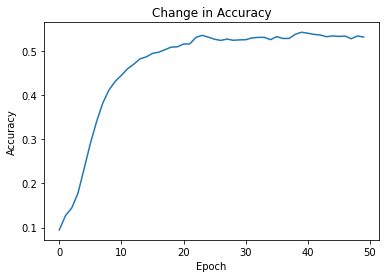

In [66]:
#Accuracy vs Epochs
plt.plot(range(epochs),acc_plt)
plt.title("Change in Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

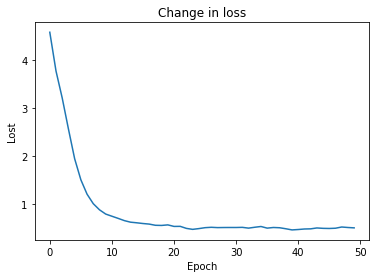

In [67]:
#loss vs Epochs
plt.plot(range(epochs),loss_plt)
plt.title("Change in loss")
plt.xlabel('Epoch')
plt.ylabel('Lost')
plt.show()

Validation

In [68]:
#get all the codes/tokens we additionaly added in the vocab dictionary
garbage = []
for code in codes:
  print(vocabs_to_index[code])
  garbage.append(vocabs_to_index[code])

#prepare the question,answer and prediction data
def print_data(i,batch_x,index_to_vocabs):
  data = []
  for n in batch_x[i]:
    if n==garbage[1]:
      break
    else:
      if n not in [6283,6285,6286]:
        data.append(index_to_vocabs[n])
  return data

ques = []
real_answer = []
pred_answer = []
for i in range(len(val_batch_x)):
  ques.append(print_data(i,batch_x,index_to_vocabs))
  real_answer.append(print_data(i,batch_y,index_to_vocabs))
  pred_answer.append(print_data(i,pred,index_to_vocabs))

#Printing Real and predicted Answers  
for i in range(len(val_batch_x)):
    print('row %d'%(i+1))
    print('QUESTION:',' '.join(ques[i]))
    print('REAL ANSWER:',' '.join(real_answer[i]))
    print('PREDICTED ANSWER:',' '.join(pred_answer[i]),'\n')

6283
6284
6285
6286
row 1
QUESTION: and your passport
REAL ANSWER: yes do not worry
PREDICTED ANSWER: yes do not worry 

row 2
QUESTION: i darling
REAL ANSWER: goodbye darling
PREDICTED ANSWER: goodbye darling 

row 3
QUESTION: goodbye darling
REAL ANSWER: goodbye darling
PREDICTED ANSWER: goodbye darling 

row 4
QUESTION: good night
REAL ANSWER: that is my good boy
PREDICTED ANSWER: that is my good night 

row 5
QUESTION: you mean the laboratory
REAL ANSWER: yes the laboratory
PREDICTED ANSWER: yes the laboratory 

row 6
QUESTION: well we will see
REAL ANSWER: will there be anything else
PREDICTED ANSWER: okayit is good knowing the time 

row 7
QUESTION: dr frankenstein
REAL ANSWER: fron kon steen
PREDICTED ANSWER: fron kon steen 

row 8
QUESTION: fron kon steen
REAL ANSWER: my name is
PREDICTED ANSWER: are you putting me on 

row 9
QUESTION: break that old mangs violin
REAL ANSWER: i did not do that
PREDICTED ANSWER: i did i did not do 

row 10
QUESTION: yes sir
REAL ANSWER: one week